## **Causality HW 1**

We are going to simulate the dynamical (brain) system with state matrix $A$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def create_state_matrix(n_dim=10):
    """
    Create state matrix where we reweight to smaller singular value
    """
    A = np.random.rand(n_dim, n_dim)
    A = (A < 0.1).astype(float) # sparse A matrix
    u, s, v = np.linalg.svd(A) # singular value decomposition
    A = A / (s[0] * 1.01) # reweight matrix
    return A

def simulate_system(A, n_timestep=1000, noise_level=0.5):
    """
    Simulate the system with n_timestep, noise level
    """
    n, _ = A.shape
    x_vec = []
    x = np.random.randn(n, 1)
    for _ in range(n_timestep):
        x = A.dot(x) + noise_level * np.random.randn(n, 1)
        x_vec.append(x)
    x_vec = np.hstack(x_vec)
    return x_vec

## **Comparison**

We will now generate A with small dimension, A with larger dimension

First, try with $A$ of dimension 10

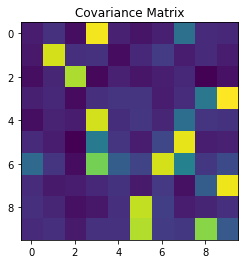

In [4]:
n_timestep = 1000
noise_level = 0.5
A = create_state_matrix(n_dim=10)
x_vec = simulate_system(A, n_timestep=n_timestep, noise_level=noise_level)

n = x_vec.shape[0]
A_approx = np.corrcoef(x_vec[:, :n_timestep - 1], x_vec[:, 1:], rowvar=1)[n:, 0:n]
plt.imshow(A_approx)
plt.title('Covariance Matrix')
plt.show()

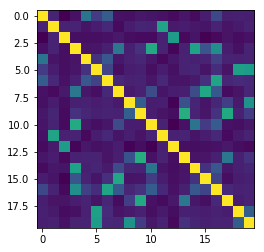

In [5]:
plt.imshow(np.corrcoef(x_vec[:, :n_timestep - 1], x_vec[:, 1:n_timestep], rowvar=1))
plt.show()

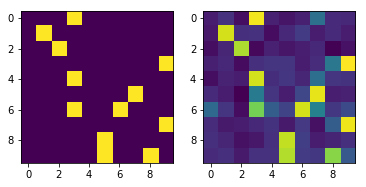

[[1.         0.94695875]
 [0.94695875 1.        ]]


In [8]:
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.subplot(1, 2, 2)
plt.imshow(A_approx)
plt.show()
print(np.corrcoef(A.ravel(), A_approx.ravel()))

The correlation is pretty high (observed ~ 0.915 in our particular example). Now, we try with $A$ dimension of 100, e.g. the brain is bigger now.

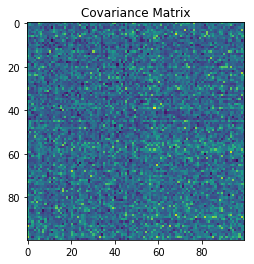

In [9]:
A = create_state_matrix(n_dim=100)
x_vec = simulate_system(A, n_timestep=1000, noise_level=0.5)

n = x_vec.shape[0]
A_approx = np.cov(x_vec[:, :n_timestep - 1], x_vec[:, 1:], rowvar=1)[n:, 0:n]
plt.imshow(A_approx)
plt.title('Covariance Matrix')
plt.show()

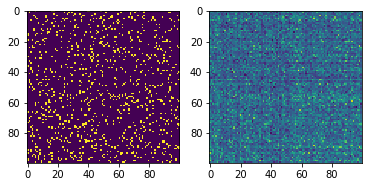

[[1.         0.61700318]
 [0.61700318 1.        ]]


In [10]:
plt.subplot(1, 2, 1)
plt.imshow(A)
plt.subplot(1, 2, 2)
plt.imshow(A_approx)
plt.show()
print(np.corrcoef(A.ravel(), A_approx.ravel()))

The correlation reduces to 0.62 from 0.9 for larger system!

Now, imagine if we only observe only a linear combination of output. 
Think of this scenario as a measure of fMRI data or EEG data where we only observe a combination of neural activity.

In [11]:
n, m = A.shape
B = np.zeros((int(n/10), m))
for i in range(10):
    B[i, i * 10: (i + 1) * 10] = 1
y = B.dot(x_vec) # B here is a observe matrix, e.g. we only observe linear combination of neurons

In [13]:
x_vec.shape, y.shape

((100, 1000), (10, 1000))

In [14]:
C_y = np.cov(y[:, :n_timestep - 1], y[:, 1:], rowvar=1)

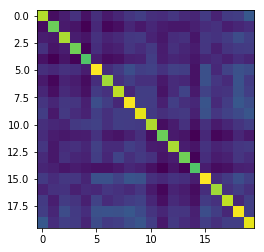

In [15]:
plt.imshow(C_y)
plt.show()